# 02582 Computational Data Analysis - Case 2

**Group 16 - members**:
- Anastasia Maftei: s226765
- Beatriz Braga De Carvalho: s233576
- Raquel Moleiro Marques: s243636
- Sree Keerthi Desu: s243933

___________

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer

________

## Load data

In [2]:
data = pd.read_csv('data/HR_data_2.csv')
data.head()

,Unnamed: 0,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [3]:
data.columns

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [4]:
# Remove the first column
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data.info() # Detailed information on features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HR_TD_Mean           312 non-null    float64
 1   HR_TD_Median         312 non-null    float64
 2   HR_TD_std            312 non-null    float64
 3   HR_TD_Min            312 non-null    float64
 4   HR_TD_Max            312 non-null    float64
 5   HR_TD_AUC            312 non-null    float64
 6   HR_TD_Kurtosis       312 non-null    float64
 7   HR_TD_Skew           312 non-null    float64
 8   HR_TD_Slope_min      312 non-null    float64
 9   HR_TD_Slope_max      312 non-null    float64
 10  HR_TD_Slope_mean     312 non-null    float64
 11  HR_TD_Slope          312 non-null    float64
 12  TEMP_TD_Mean         312 non-null    float64
 13  TEMP_TD_Median       312 non-null    float64
 14  TEMP_TD_std          312 non-null    float64
 15  TEMP_TD_Min          312 non-null    flo

In [6]:
# Check for missing values
# print vars that have missing values and their counts
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)

Missing values:
 EDA_TD_P_RT     1
EDA_TD_P_ReT    1
inspired        2
attentive       1
afraid          1
active          1
determined      2
dtype: int64


In [7]:
id_columns = ['Round', 'Phase', 'Individual', 'Puzzler', 'original_ID', 'raw_data_path', 'Team_ID', 'Cohort']

In [8]:
# Extract questionnaire data
questionnaire = data[[col for col in data.columns if 'EDA_' not in col if 'TEMP_' not in col if 'HR_' not in col]].copy()

# Extract numerical data
numerical = data[[col for col in data.columns if 'EDA_' in col or 'TEMP_' in col or 'HR_' in col or col in col in id_columns ]].copy()

In [9]:
# Extract individual time domain signal measures
heart_rate = pd.concat([data[id_columns], data[[col for col in data.columns if 'HR_TD_' in col]]], axis=1)
temperature = pd.concat([data[id_columns], data[[col for col in data.columns if 'TEMP_TD_' in col]]], axis=1)
eda_phasic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_P_' in col]]], axis=1)
# ^ also has reaction tie, peaks, and rise time
eda_tonic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_T_' in col]]], axis=1)

__________

# Preliminary analysis

In [10]:
# Generate histograms
def hist_subplots(dataset, id_columns, fig=None):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]
    # print(dataset[dataset['Phase']=='phase1'])
    # Plot distribution of each feature
    if fig is None:
        fig = plt.figure(figsize=(20, 40))
    for i, col in enumerate(rel_features):
        plt.subplot(15, 4, i + 1)
        sns.histplot(dataset[dataset['Phase']=='phase1'][col], color='green', alpha=0.5, label='Phase 1', kde=True)
        sns.histplot(dataset[dataset['Phase']=='phase2'][col], color='red', alpha=0.5, label='Phase 2', kde=True)
        sns.histplot(dataset[dataset['Phase']=='phase3'][col], color='yellow', alpha=0.5, label='Phase 3', kde=True)
        plt.legend()
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [11]:
# Generate correlation matrix
def corr_heatmap(dataset, id_columns):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]

    # Subset with only relevant features
    subset_ph1 = dataset[dataset['Phase']=='phase1'][rel_features]
    subset_ph2 = dataset[dataset['Phase']=='phase2'][rel_features]
    subset_ph3 = dataset[dataset['Phase']=='phase3'][rel_features]

    # Triangular correlation matrix
    mask_1 = np.triu(np.ones_like(subset_ph1.corr(), dtype=bool))
    mask_2 = np.triu(np.ones_like(subset_ph2.corr(), dtype=bool))
    mask_3 = np.triu(np.ones_like(subset_ph3.corr(), dtype=bool))

    # Correlation heatmap
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.title('Phase 1 Correlation matrix')
    sns.heatmap(subset_ph1.corr(), mask=mask_1, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
    plt.subplot(1, 3, 2)
    plt.title('Phase 2 Correlation matrix')
    sns.heatmap(subset_ph2.corr(), mask=mask_2, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
    plt.subplot(1, 3, 3)
    plt.title('Phase 3 Correlation matrix')
    sns.heatmap(subset_ph3.corr(), mask=mask_3, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)
    plt.show()

## Numerical data
### Heart rate

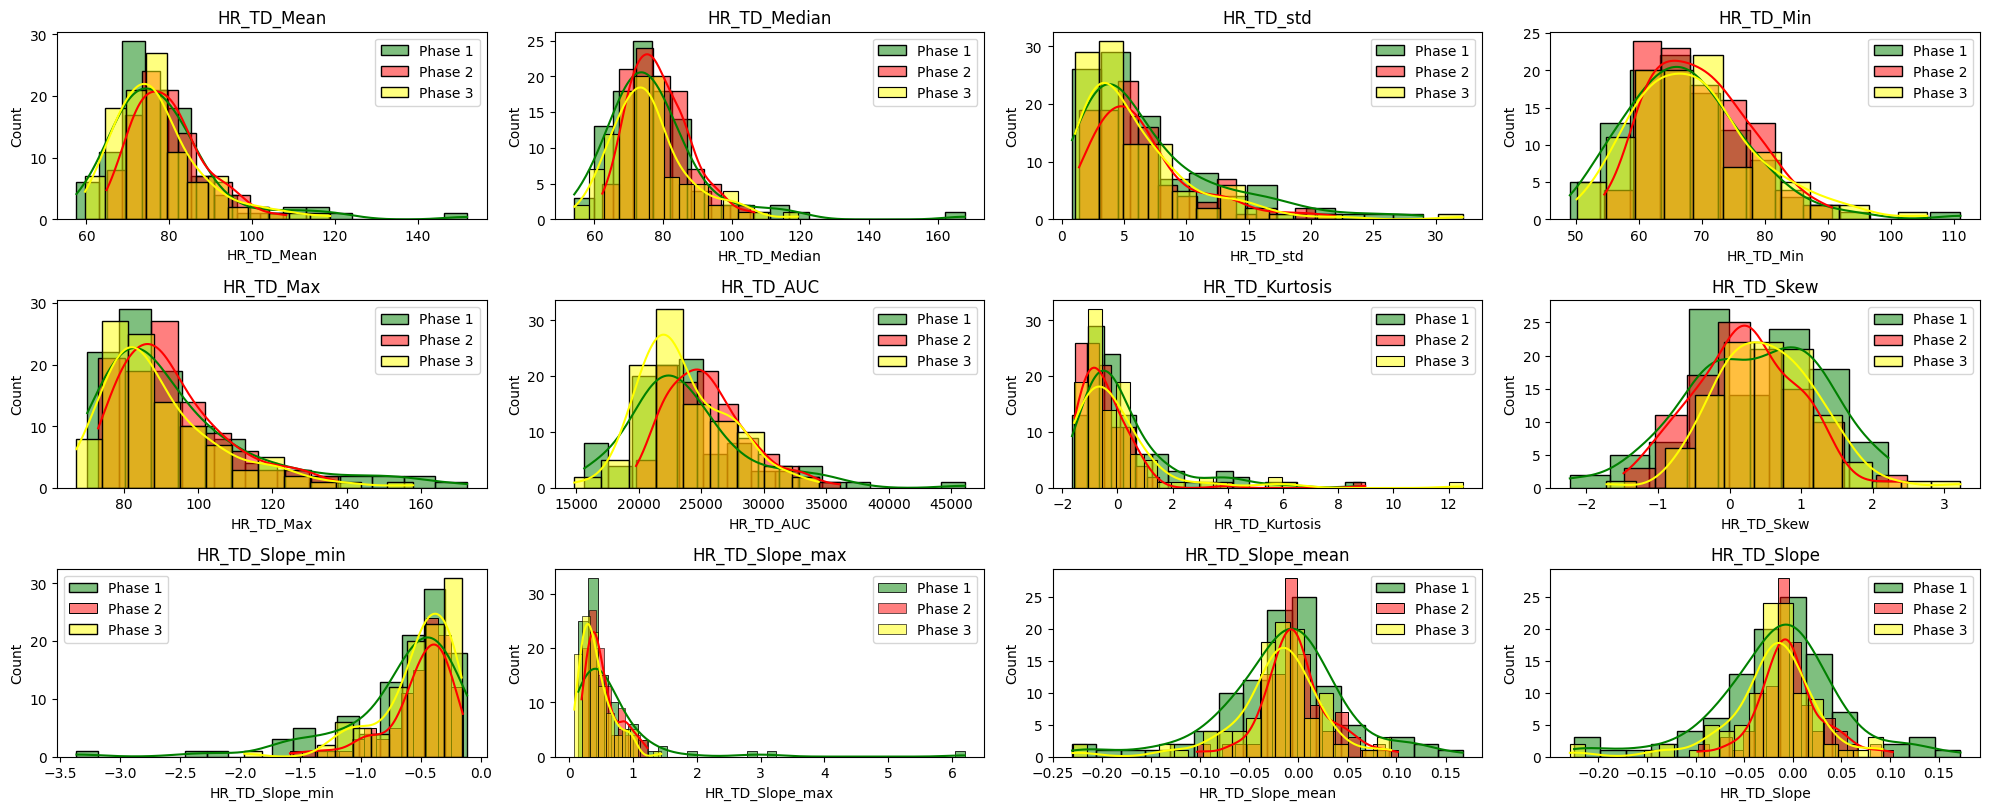

In [12]:
hist_subplots(heart_rate, id_columns)

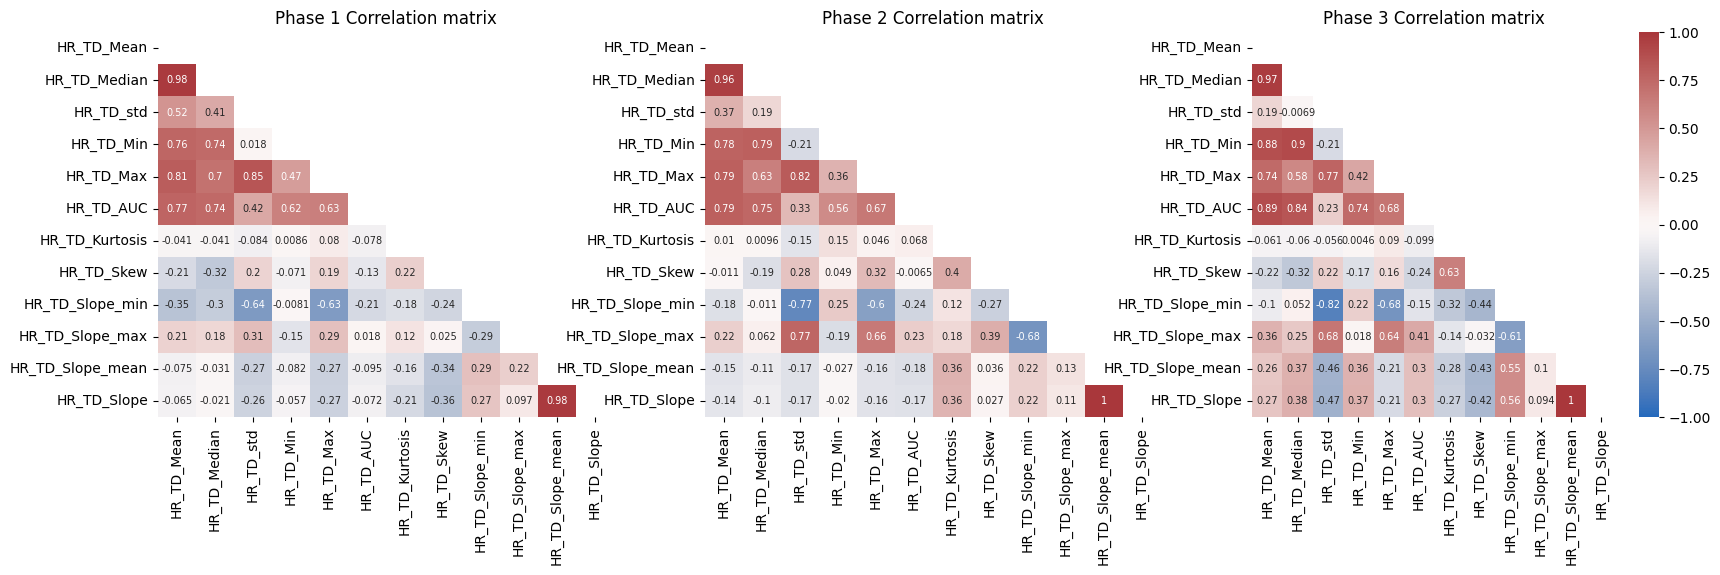

In [13]:
corr_heatmap(heart_rate, id_columns)

### Temperature

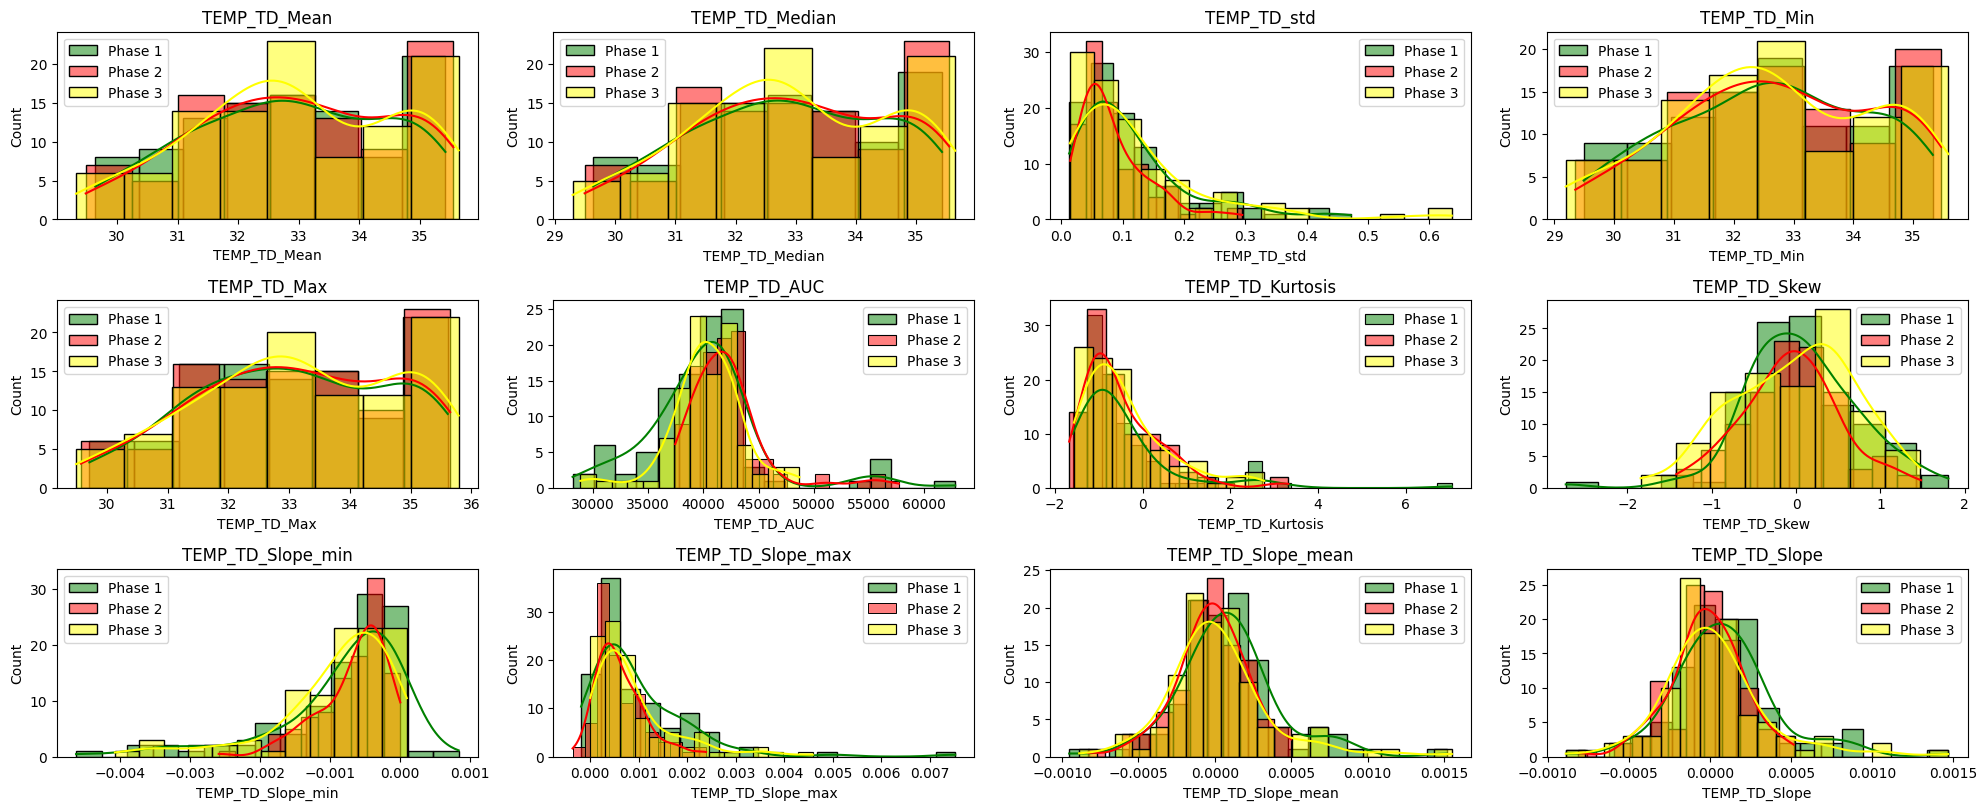

In [14]:
hist_subplots(temperature, id_columns)

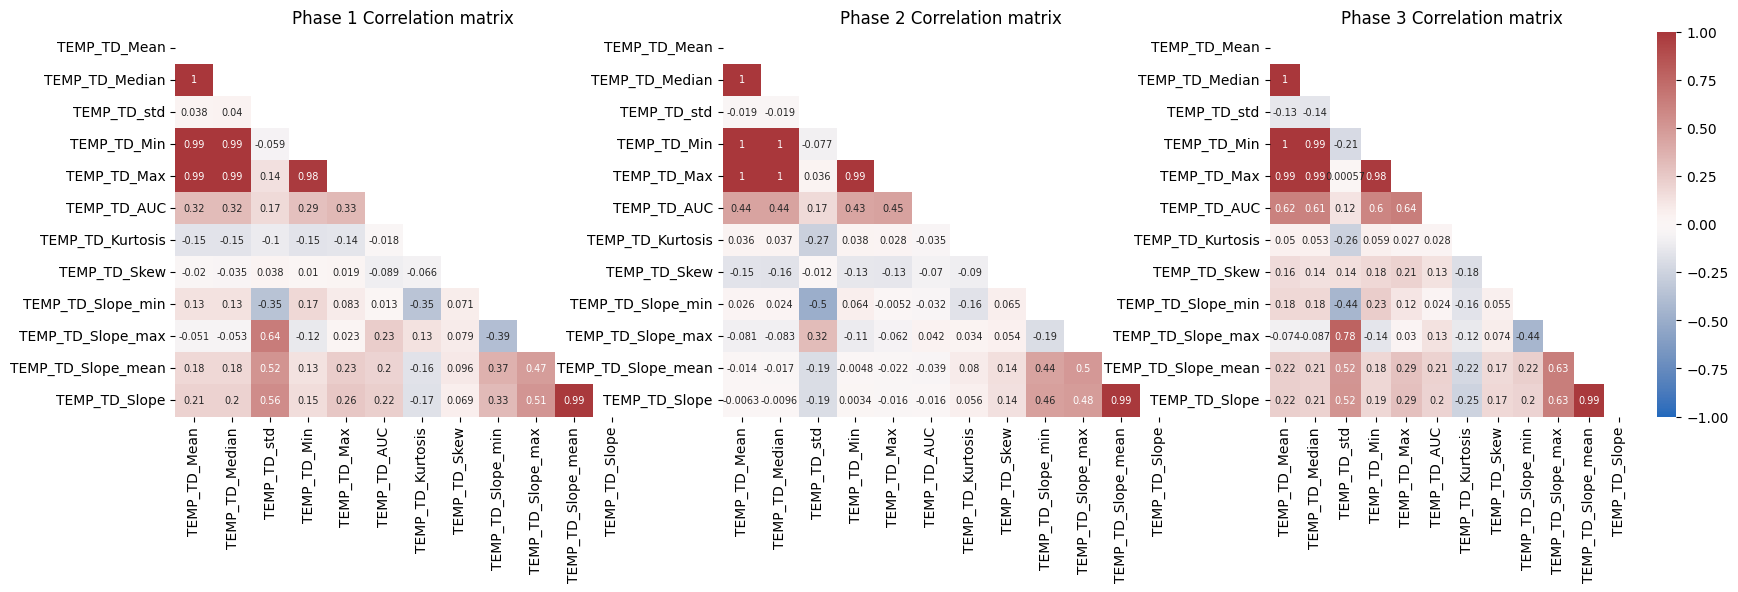

In [15]:
corr_heatmap(temperature, id_columns)

### EDA Phasic

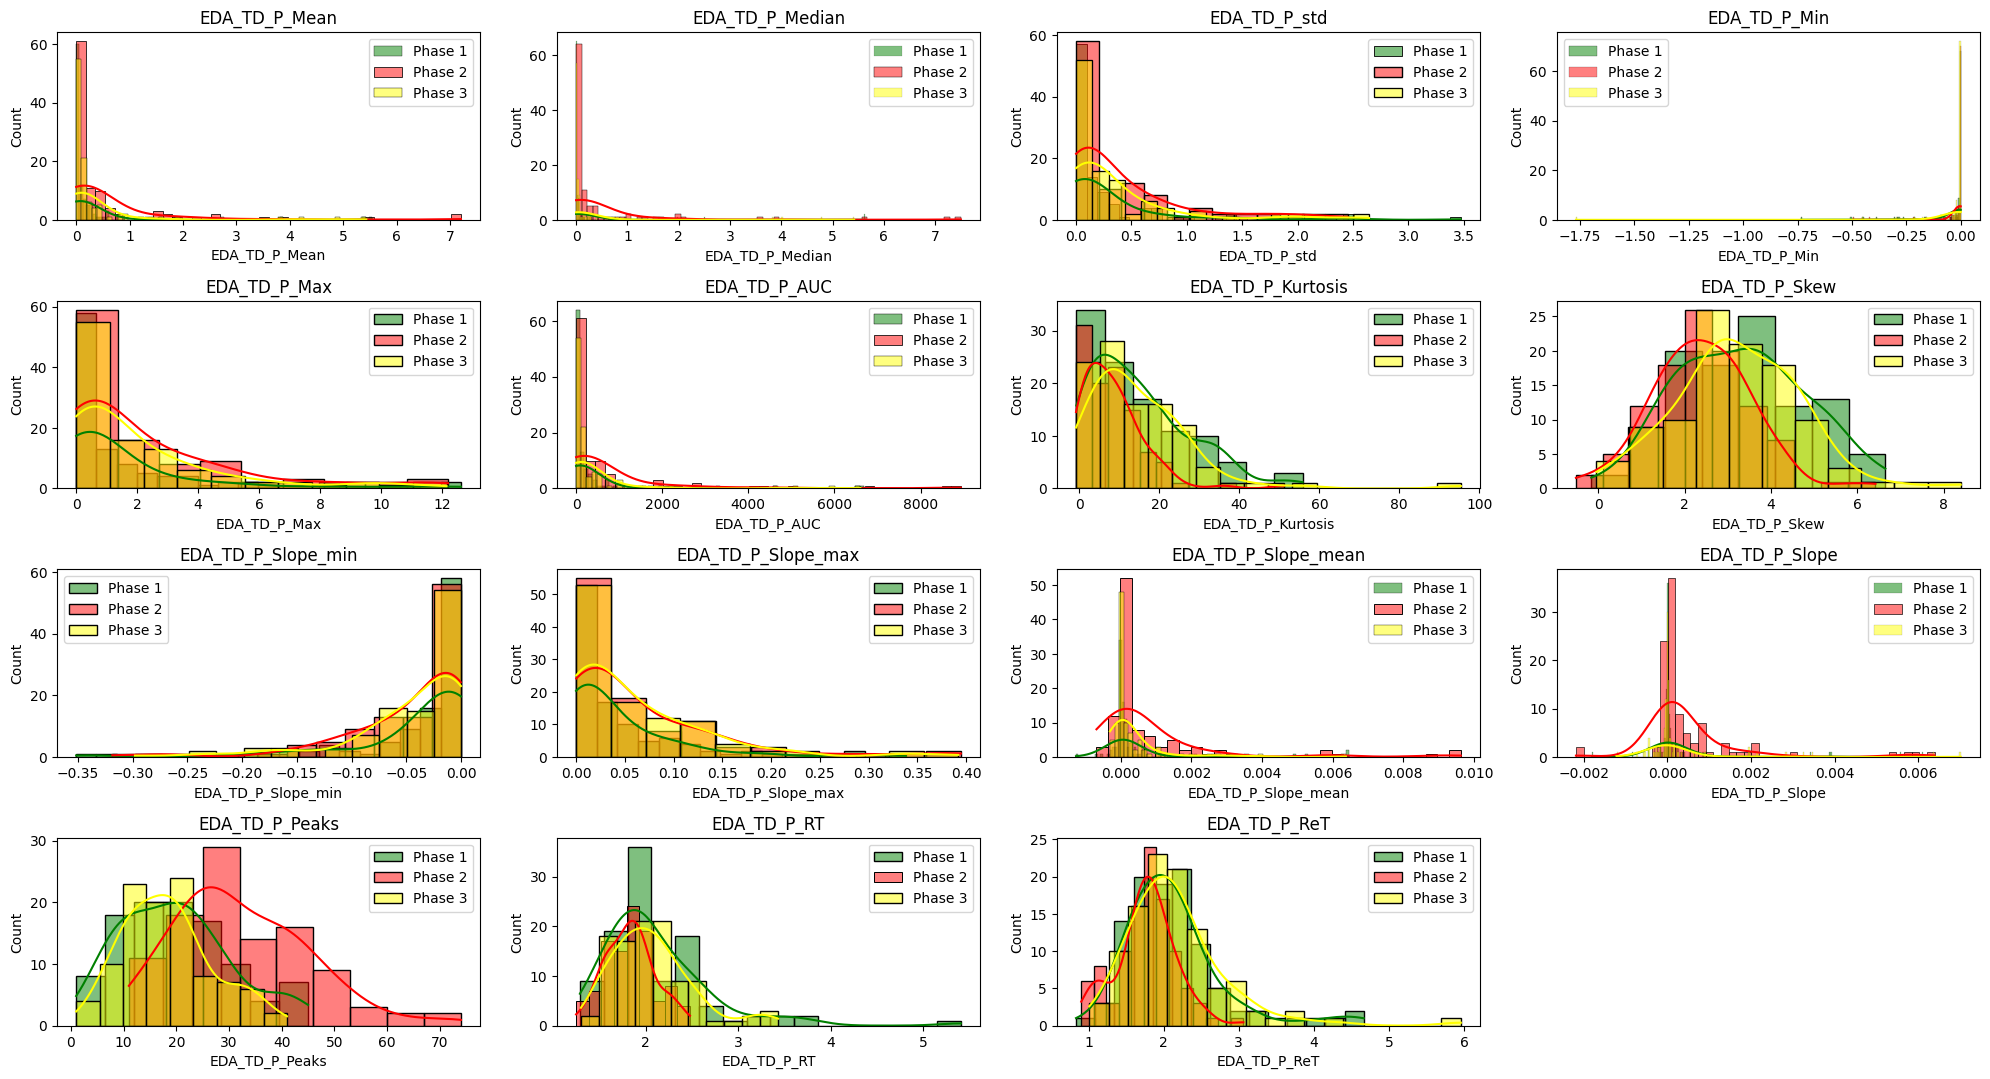

In [16]:
hist_subplots(eda_phasic, id_columns)

In [17]:
data[data['Phase']=='phase1']['EDA_TD_P_Peaks'].describe()

count    104.000000
mean      19.846154
std       10.478614
min        1.000000
25%       11.750000
50%       19.500000
75%       26.250000
max       45.000000
Name: EDA_TD_P_Peaks, dtype: float64

In [18]:
data[data['Phase']=='phase2']['EDA_TD_P_Peaks'].describe()

count    104.000000
mean      32.384615
std       12.717473
min       11.000000
25%       23.750000
50%       30.000000
75%       41.000000
max       74.000000
Name: EDA_TD_P_Peaks, dtype: float64

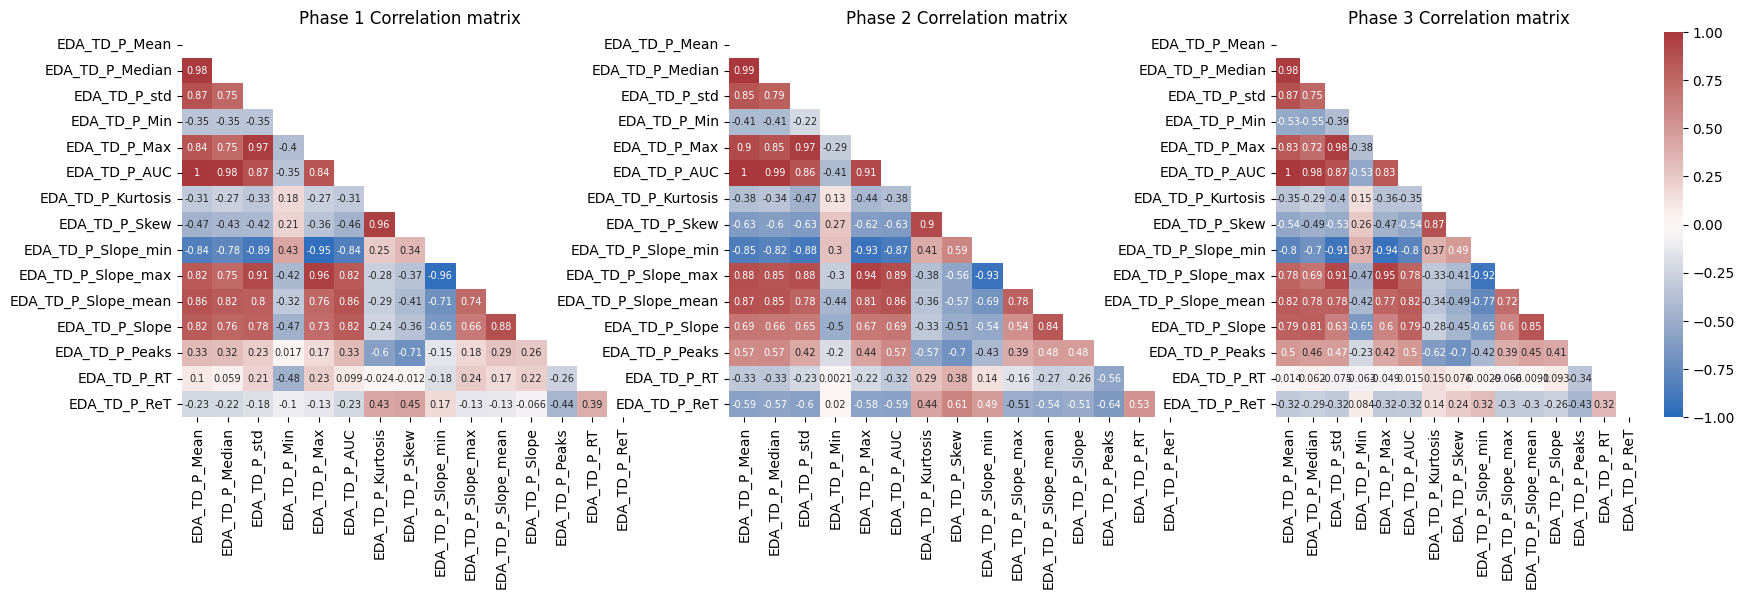

In [19]:
corr_heatmap(eda_phasic, id_columns)

### EDA Tonic

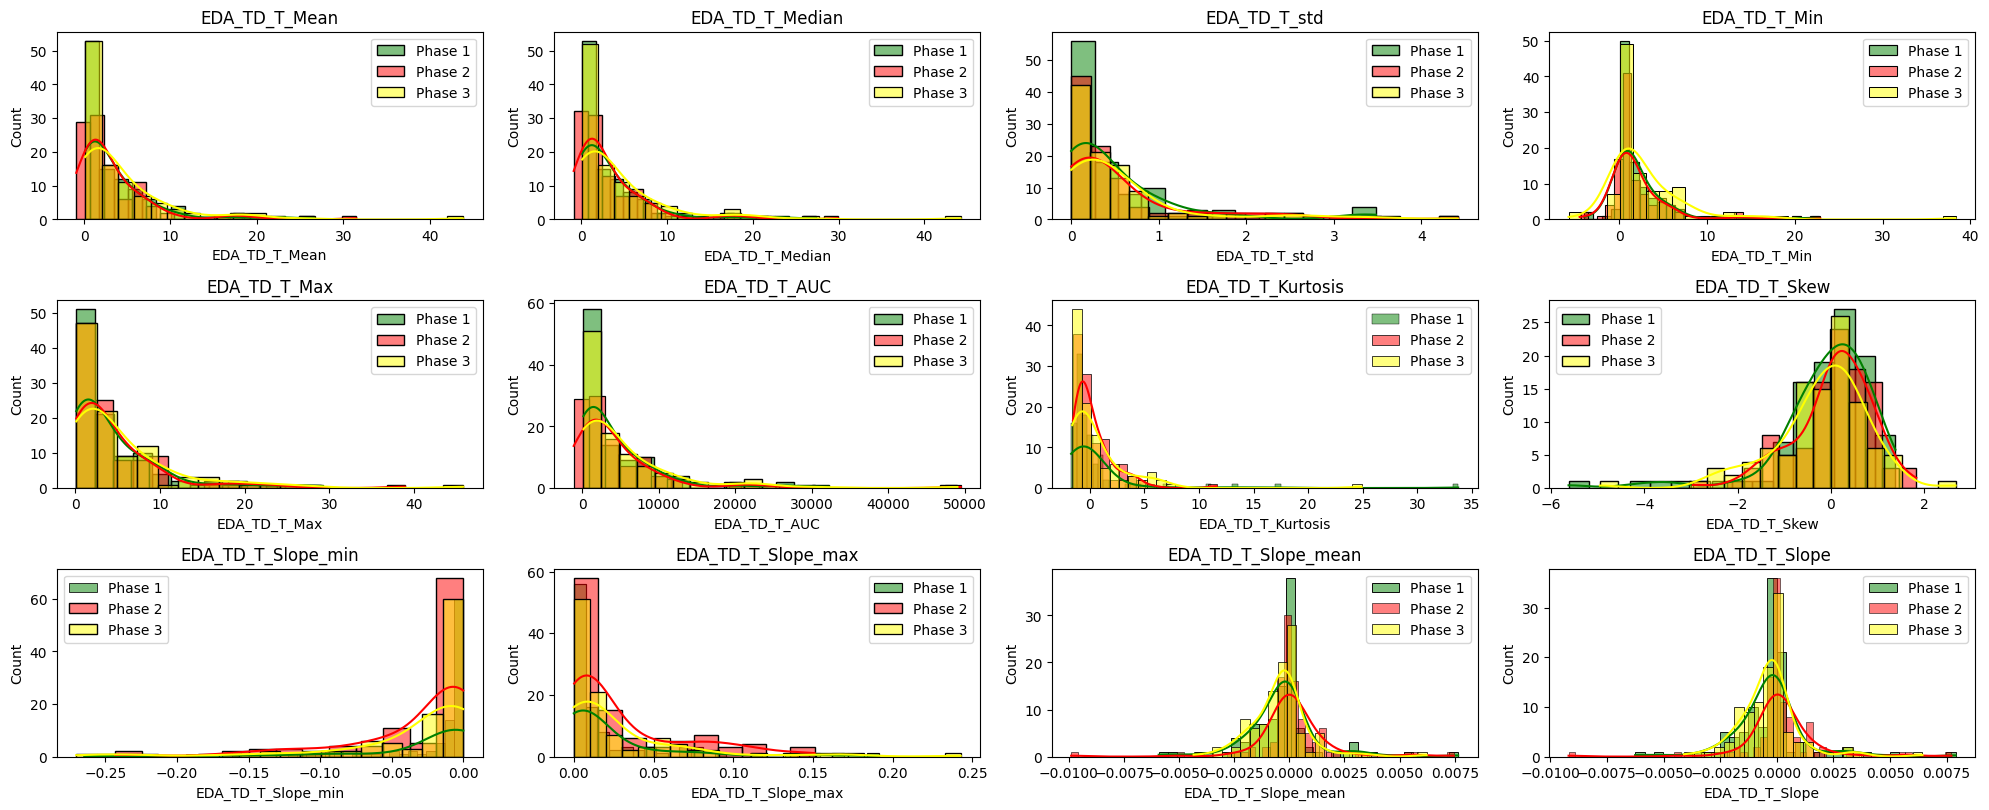

In [20]:
hist_subplots(eda_tonic, id_columns)

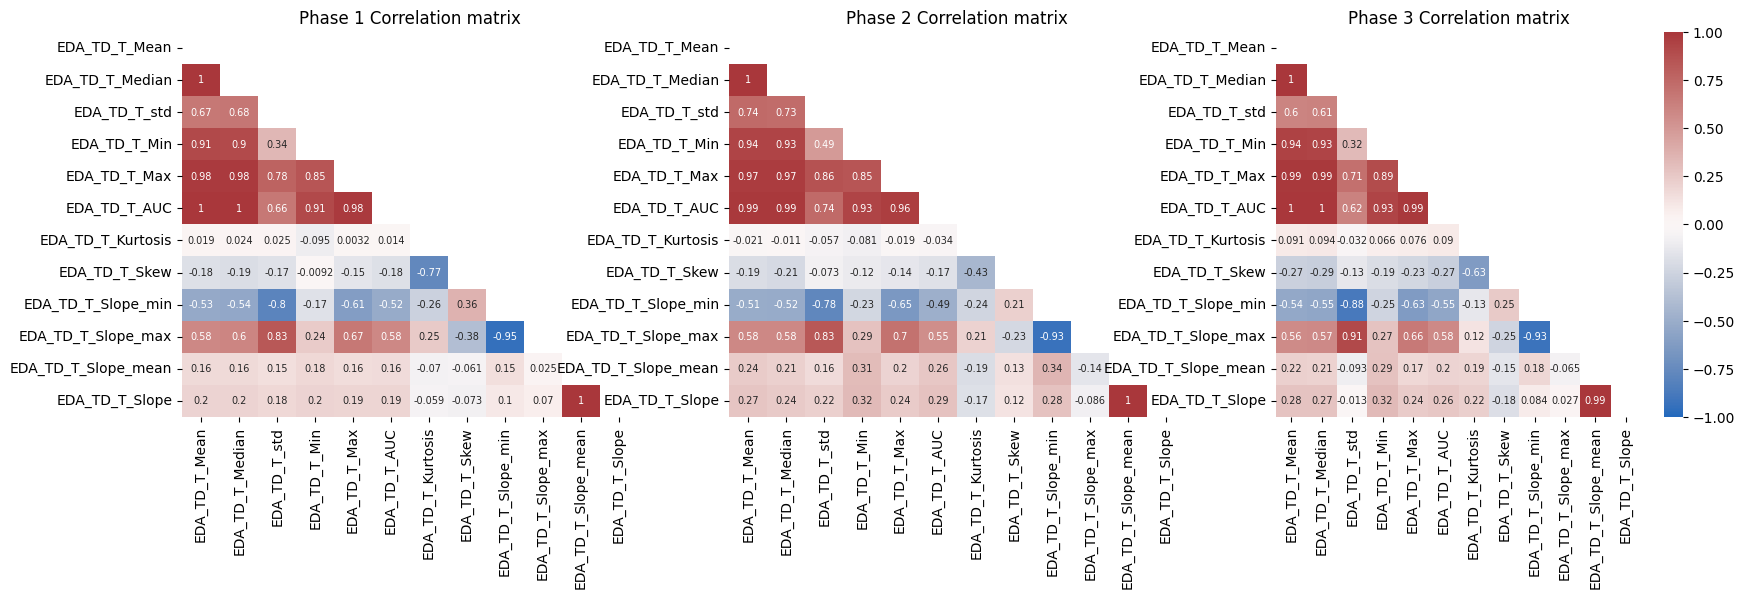

In [21]:
corr_heatmap(eda_tonic, id_columns)

## Questionnaire data

In [22]:
questionnaire_features = [col for col in questionnaire.columns if col not in id_columns]

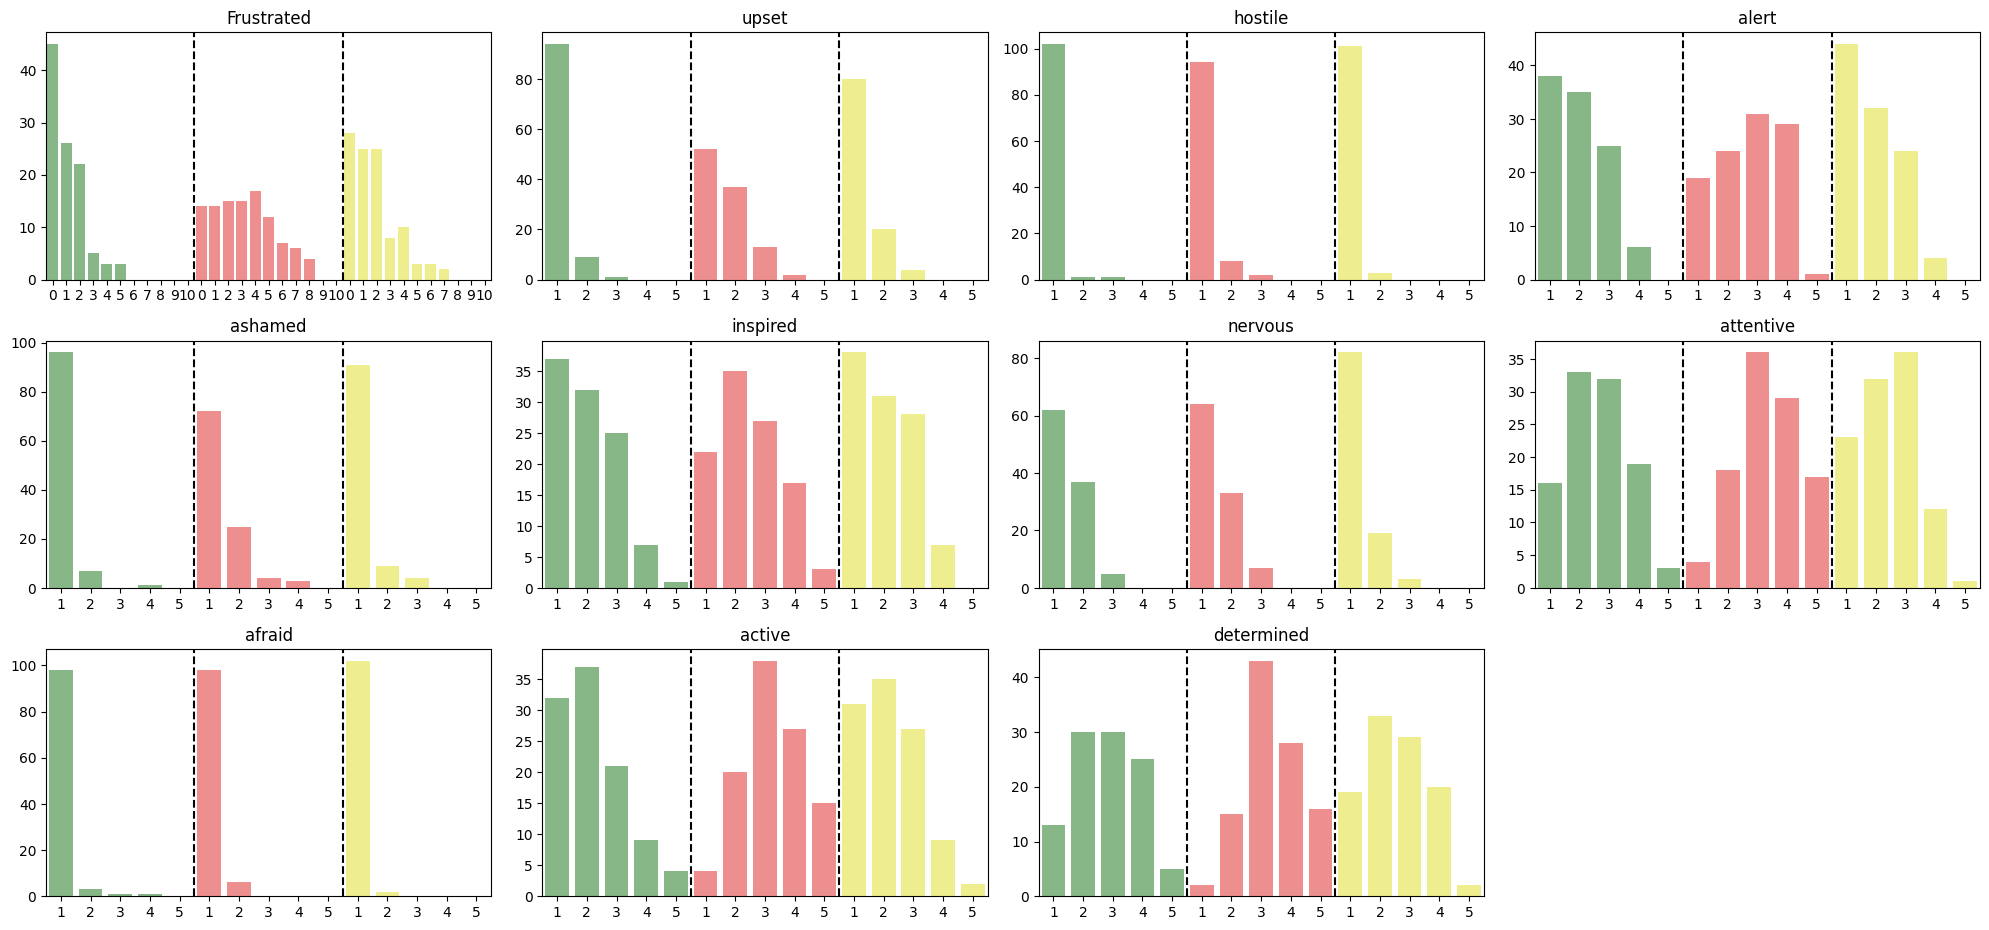

In [23]:
plt.figure(figsize=(20, 40))
# _, ax = plt.subplots(6, 3, figsize=(20,10))
for i, col in enumerate(questionnaire_features):
    if col.lower() == 'frustrated':
        full_range = list(range(0, 11))  # 0 to 10
    else:
        full_range = list(range(1, 6))   # 1 to 5

    value_counts_ph1 = questionnaire[questionnaire['Phase']=='phase1'][col].value_counts().reindex(full_range, fill_value=0)
    value_counts_ph2 = questionnaire[questionnaire['Phase']=='phase2'][col].value_counts().reindex(full_range, fill_value=0)
    value_counts_ph3 = questionnaire[questionnaire['Phase']=='phase3'][col].value_counts().reindex(full_range, fill_value=0)

    # Convert x to string to treat them as categorical labels
    plt.subplot(13, 4, i + 1)
    sns.barplot(x=[str(x) for x in value_counts_ph1.index], y=value_counts_ph1.values, color='green', alpha=0.5)
    sns.barplot(x=[str(x+0.01) for x in value_counts_ph2.index], y=value_counts_ph2.values, color='red', alpha=0.5)
    sns.barplot(x=[str(x+0.02) for x in value_counts_ph3.index], y=value_counts_ph3.values, color='yellow', alpha=0.5)
    # plt.legend()

    plt.xticks([i for i, val in enumerate([str(x) for x in full_range]*3)], [str(x) for x in full_range]*3)

    if i==0:
        plt.axvline(x=10.5, color='black', linestyle='--')
        plt.axvline(x=21.5, color='black', linestyle='--')
    else:
        plt.axvline(x=4.5, color='black', linestyle='--')
        plt.axvline(x=9.5, color='black', linestyle='--')
    
    # sns.catplot(data=questionnaire, x=col, hue='Phase', kind='count', palette=['green', 'red', 'yellow'], alpha=0.5, dodge=True, height=4, aspect=2)
                # , ax=ax[i//3][i%3])
    
    plt.title(col)
    plt.xlabel("")  
    plt.ylabel("")



plt.tight_layout()
plt.show()

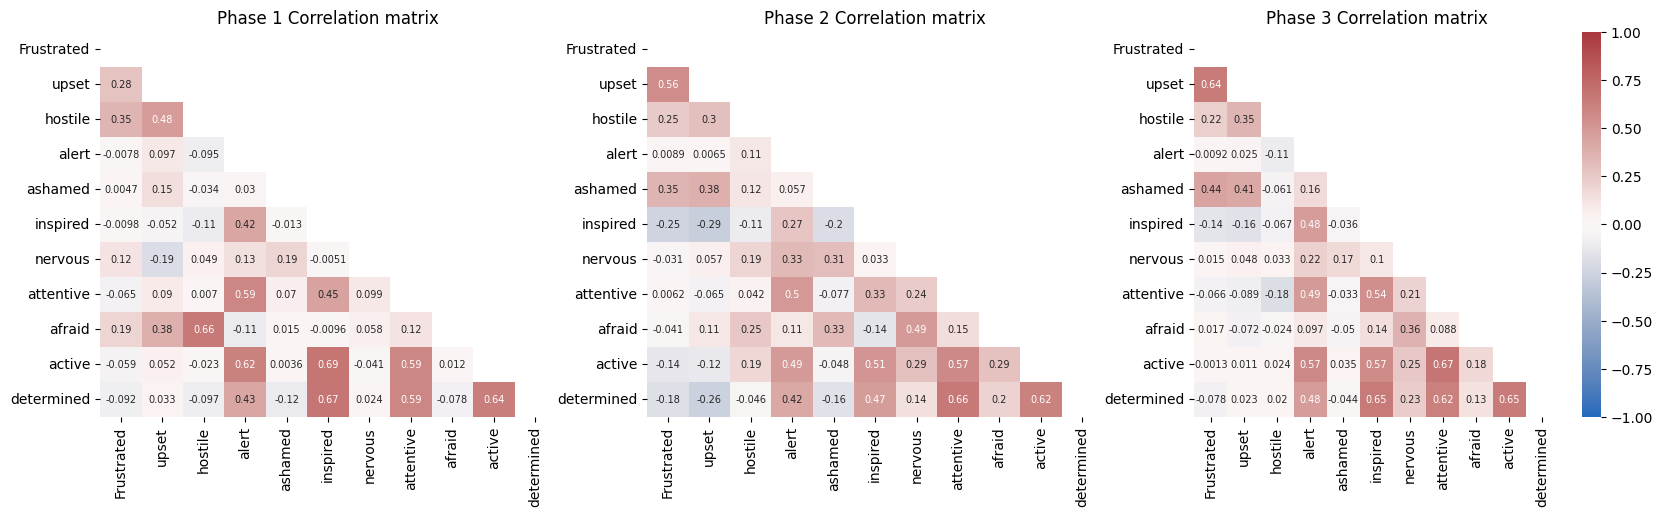

In [24]:
# Subset with only relevant features
questionnaire_subset_ph1 = questionnaire[questionnaire['Phase']=='phase1'][questionnaire_features]
questionnaire_subset_ph2 = questionnaire[questionnaire['Phase']=='phase2'][questionnaire_features]
questionnaire_subset_ph3 = questionnaire[questionnaire['Phase']=='phase3'][questionnaire_features]

# Triangular correlation matrix
mask_ph1 = np.triu(np.ones_like(questionnaire_subset_ph1.corr(), dtype=bool))
mask_ph2 = np.triu(np.ones_like(questionnaire_subset_ph2.corr(), dtype=bool))
mask_ph3 = np.triu(np.ones_like(questionnaire_subset_ph3.corr(), dtype=bool))

# Correlation heatmap
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title('Phase 1 Correlation matrix')
sns.heatmap(questionnaire_subset_ph1.corr(), mask=mask_ph1, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
plt.subplot(1, 3, 2)
plt.title('Phase 2 Correlation matrix')
sns.heatmap(questionnaire_subset_ph2.corr(), mask=mask_ph2, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
plt.subplot(1, 3, 3)
plt.title('Phase 3 Correlation matrix')
sns.heatmap(questionnaire_subset_ph3.corr(), mask=mask_ph3, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)

plt.show()

__________

## Preprocess data

In [25]:
# List of columns to remove (questionnaire + ID columns will be re-added manually in front)
remove_columns = questionnaire_features + id_columns

# Keep only the physiological features
physio_features = [col for col in data.columns if col not in remove_columns]

# Arrange the final DataFrame with ID columns first
physio_data = data[id_columns + physio_features]
physio_data.head()

,Round,Phase,Individual,Puzzler,original_ID,raw_data_path,Team_ID,Cohort,HR_TD_Mean,HR_TD_Median,...,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
0,round_3,phase3,1,1,19.0,dataset/D1_4/ID_1/round_3/phase3,D1_4_Team10,D1_4,78.663878,76.70,...,213.374114,1.345997,-1.379434,-0.000144,0.000138,0.000010,1.036040e-05,11,2.522727,2.075000
1,round_3,phase2,1,1,19.0,dataset/D1_4/ID_1/round_3/phase2,D1_4_Team10,D1_4,76.540732,76.61,...,213.235380,0.887010,0.854067,-0.000146,0.000165,0.000009,7.714503e-06,15,2.214286,2.192308
2,round_3,phase1,1,1,19.0,dataset/D1_4/ID_1/round_3/phase1,D1_4_Team10,D1_4,78.173563,77.92,...,173.465157,0.205817,0.480581,-0.000112,0.000132,0.000002,1.799914e-06,10,1.972222,2.111111
3,round_2,phase3,1,1,19.0,dataset/D1_4/ID_1/round_2/phase3,D1_4_Team10,D1_4,83.073688,83.88,...,191.943390,2.488339,1.246665,-0.000455,0.000481,-0.000001,-1.355151e-07,12,1.886364,1.805556
4,round_2,phase2,1,1,19.0,dataset/D1_4/ID_1/round_2/phase2,D1_4_Team10,D1_4,72.281250,72.91,...,192.341180,1.196508,1.592099,-0.000420,0.000334,0.000014,1.267198e-05,20,1.812500,1.926471


# Analyse physiological measures

***The features were chosen manually based on the distribution differences between phase 1, 2, and 3 for the individual features!***

EDA is said to be a good measure of stress responses: https://www.ncbi.nlm.nih.gov/books/NBK589926/#ch5

In [26]:
# Features to compare
eda_features = ['EDA_TD_P_Peaks', 'EDA_TD_P_Skew', 'EDA_TD_P_ReT', 'EDA_TD_P_Slope', 'EDA_TD_P_Slope_mean', 'EDA_TD_P_RT',   
'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope']

# eda_features = [feature for feature in eda_phasic.columns.tolist() + eda_tonic.columns.tolist() if feature not in id_columns]

# Compute task mean (phase2)
task_data = physio_data[physio_data['Phase'] == 'phase2'].groupby("Individual")[eda_features].mean()
task_data.columns = [f"{col}_Task" for col in task_data.columns]

task_data.head()

,EDA_TD_P_Peaks_Task,EDA_TD_P_Skew_Task,EDA_TD_P_ReT_Task,EDA_TD_P_Slope_Task,EDA_TD_P_Slope_mean_Task,EDA_TD_P_RT_Task,EDA_TD_T_Slope_min_Task,EDA_TD_T_Slope_max_Task,EDA_TD_T_Slope_mean_Task,EDA_TD_T_Slope_Task
Individual,,,,,,,,,,
1,16.75,4.574814,2.052016,0.000003,0.000004,1.937369,-0.000287,0.000338,0.000006,0.000006
2,32.50,1.987789,1.656207,0.000320,0.000457,1.935707,-0.030318,0.028505,0.000163,0.000159
3,38.25,2.000525,1.814105,0.000029,0.000182,1.903048,-0.003355,0.006125,0.000363,0.000374
4,41.00,1.574065,1.554798,0.001240,0.001536,1.568600,-0.045231,0.040945,0.001768,0.001848
5,31.50,2.348305,1.758533,0.000981,0.000921,2.121259,-0.029334,0.028893,0.000111,0.000228


In [27]:
# Normalize the data
normalized_task_data = Normalizer().fit_transform(task_data.values)

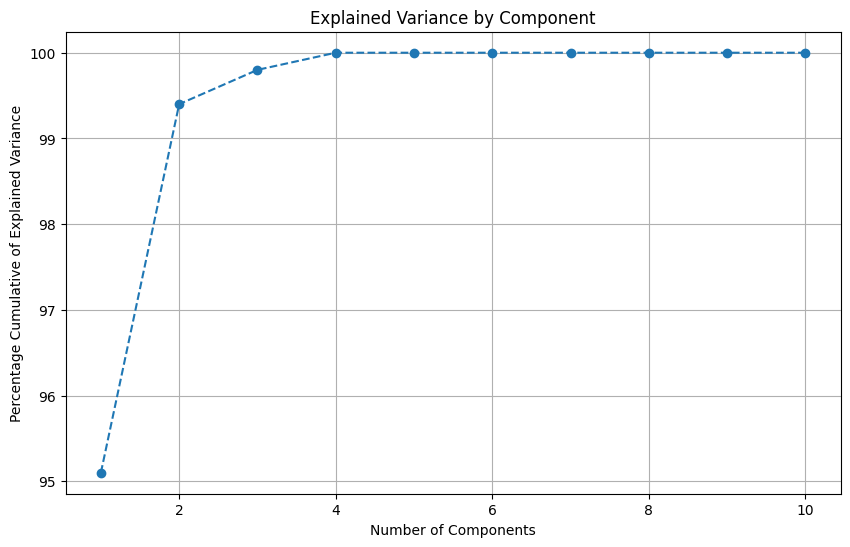

In [28]:
# Perform PCA analysis to find the number of components to keep
pca = PCA()
pca.fit(normalized_task_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

In [29]:
# Perform PCA with 2 components (optimal as found from explained variance plot) 
pca = PCA(n_components = 2)
pca.fit(normalized_task_data)
scores_pca = pca.transform(normalized_task_data)

In [30]:
# Perform kmeans clustering analysis using the PCA scores to find the optimal number of clusters
WCSS = []

for i in range(1,27):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

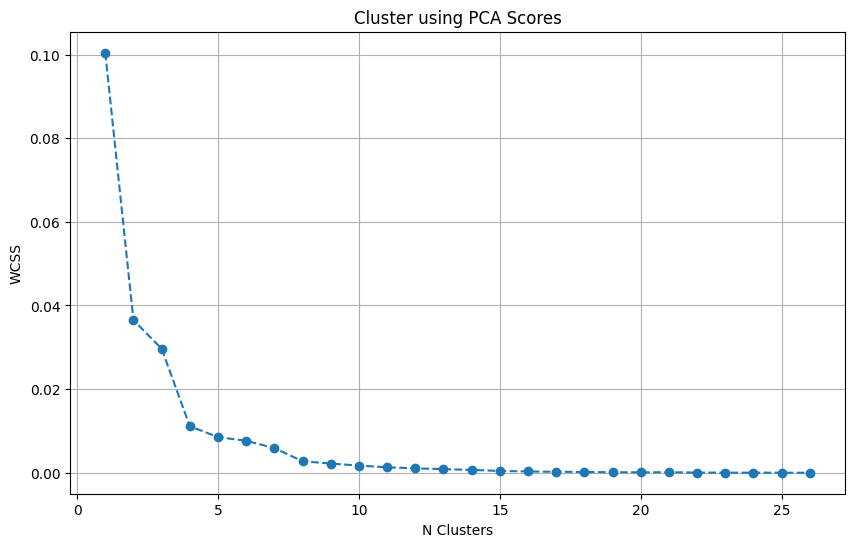

In [31]:
plt.figure(figsize = (10,6))
plt.plot(range(1,27), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [32]:
# Choose 5 clusters based on the elbow method
kmeans_pca = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

## Assign each individual a stress result based on findings

In [33]:
# Add to the dataset which cluster each individual belongs to
labels = kmeans_pca.labels_
task_data['Cluster'] = labels

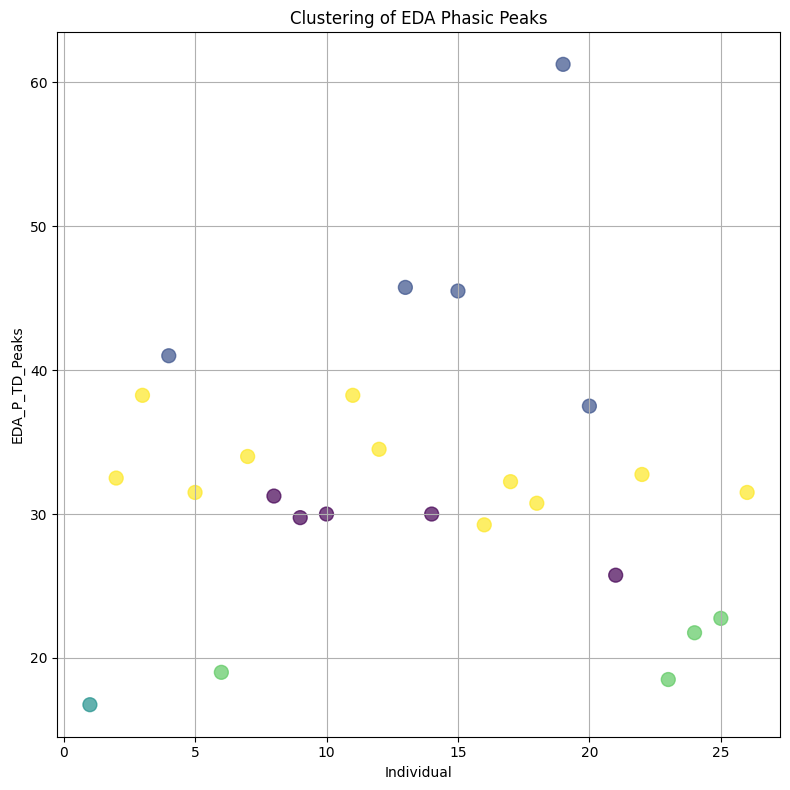

In [34]:
# Plot the results
plt.figure(figsize=(8, 8))
plt.scatter(task_data.index, task_data["EDA_TD_P_Peaks_Task"], 
            c=labels, cmap="viridis", s=100, alpha=0.7)
plt.title("Clustering of EDA Phasic Peaks")
plt.xlabel("Individual")
plt.ylabel("EDA_P_TD_Peaks")
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# Compute cluster summary
cluster_summary = task_data.groupby("Cluster").mean().reset_index()
cluster_summary

,Cluster,EDA_TD_P_Peaks_Task,EDA_TD_P_Skew_Task,EDA_TD_P_ReT_Task,EDA_TD_P_Slope_Task,EDA_TD_P_Slope_mean_Task,EDA_TD_P_RT_Task,EDA_TD_T_Slope_min_Task,EDA_TD_T_Slope_max_Task,EDA_TD_T_Slope_mean_Task,EDA_TD_T_Slope_Task
0,0,29.350000,2.998659,1.875469,0.000092,0.000083,1.856445,-0.003514,0.003364,0.000010,0.000017
1,1,46.200000,1.264339,1.350086,0.001599,0.002812,1.555075,-0.088665,0.072703,-0.000072,0.000141
2,2,16.750000,4.574814,2.052016,0.000003,0.000004,1.937369,-0.000287,0.000338,0.000006,0.000006
3,3,20.500000,2.927124,2.107410,0.000201,0.000343,1.987392,-0.016449,0.016590,0.000036,0.000067
4,4,33.227273,2.248530,1.754146,0.000342,0.000547,1.875640,-0.030724,0.030093,0.000317,0.000374


In [36]:
# Values are chosen based on EDA_D_P_Peaks_Task
task_data['FeltStimulated'] = task_data['Cluster'].map({0: 'Medium', 1: 'Very High', 2: 'Very Low', 3: 'Low', 4: 'High'})

# Was the participant truly active/stimulated?

In [37]:
data['Frustrated'].unique()

array([2., 3., 0., 1., 7., 4., 5., 6., 8.])

In [38]:
# How much the individual felt as though they were stimulated during the task => perceived stimulation
task_data['PerceivedStimulated'] = data['active'].map({1:'Very Low', 2:'Low', 3:'Medium', 4:'High', 5:'Very High'})

In [39]:
# Participant's who correctly and wrongly identified their stimulation level
correctly_identified = task_data[task_data['FeltStimulated'] == task_data['PerceivedStimulated']]
wrongly_identified = task_data[task_data['FeltStimulated'] != task_data['PerceivedStimulated']]

In [40]:
print(f"Correctly identified: {len(correctly_identified)}")
print(f"Wrongly identified: {len(wrongly_identified)}")

Correctly identified: 5
Wrongly identified: 21
